In [254]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [255]:
#Loading and previewing the dataset
data = pd.read_csv("index.csv")

In [256]:
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [257]:
# Previewing the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [258]:
# Checking dataset information
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [259]:
# Convert Date and DateTime columns to datetime objects
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

In [260]:
data['date']

0      2024-03-01
1      2024-03-01
2      2024-03-01
3      2024-03-01
4      2024-03-01
          ...    
1128   2024-07-31
1129   2024-07-31
1130   2024-07-31
1131   2024-07-31
1132   2024-07-31
Name: date, Length: 1133, dtype: datetime64[ns]

In [261]:
data['datetime']

0      2024-03-01 10:15:50.520
1      2024-03-01 12:19:22.539
2      2024-03-01 12:20:18.089
3      2024-03-01 13:46:33.006
4      2024-03-01 13:48:14.626
                 ...          
1128   2024-07-31 20:53:35.077
1129   2024-07-31 20:59:25.013
1130   2024-07-31 21:26:26.000
1131   2024-07-31 21:54:11.824
1132   2024-07-31 21:55:16.570
Name: datetime, Length: 1133, dtype: datetime64[ns]

In [262]:
# Drop rows with invalid or missing datetime values
data = data.dropna(subset=['date', 'datetime'])

In [263]:
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [264]:
# Fill missing values in other columns
data['cash_type'] = data['cash_type'].fillna('Unknown')
data['card'] = data['card'].fillna(0)  # Assuming 0 for no card transaction
data['money'] = data['money'].fillna(data['money'].median())
data['coffee_name'] = data['coffee_name'].fillna('Unknown')

In [265]:
data['cash_type']

0       card
1       card
2       card
3       card
4       card
        ... 
1128    card
1129    card
1130    card
1131    card
1132    card
Name: cash_type, Length: 1133, dtype: object

In [266]:
data['card']

0       ANON-0000-0000-0001
1       ANON-0000-0000-0002
2       ANON-0000-0000-0002
3       ANON-0000-0000-0003
4       ANON-0000-0000-0004
               ...         
1128    ANON-0000-0000-0443
1129    ANON-0000-0000-0040
1130    ANON-0000-0000-0444
1131    ANON-0000-0000-0445
1132    ANON-0000-0000-0446
Name: card, Length: 1133, dtype: object

In [267]:
# Print summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                                date                       datetime  \
count                           1133                           1133   
mean   2024-05-19 11:36:29.232127232  2024-05-20 02:38:39.053382912   
min              2024-03-01 00:00:00     2024-03-01 10:15:50.520000   
25%              2024-04-14 00:00:00  2024-04-14 10:55:27.406000128   
50%              2024-05-23 00:00:00  2024-05-23 12:22:06.604999936   
75%              2024-06-22 00:00:00  2024-06-22 08:39:50.272999936   
max              2024-07-31 00:00:00     2024-07-31 21:55:16.570000   
std                              NaN                            NaN   

             money  
count  1133.000000  
mean     33.105808  
min      18.120000  
25%      28.900000  
50%      32.820000  
75%      37.720000  
max      40.000000  
std       5.035366  


In [268]:
# Add new features, e.g., Hour from DateTime
data['hour'] = data['datetime'].dt.hour

In [269]:
data['hour']

0       10
1       12
2       12
3       13
4       13
        ..
1128    20
1129    20
1130    21
1131    21
1132    21
Name: hour, Length: 1133, dtype: int32

In [270]:
# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
data['cash_type'] = encoder.fit_transform(data['cash_type'])
data['coffee_name'] = encoder.fit_transform(data['coffee_name'])

In [271]:
data['cash_type'] 

0       0
1       0
2       0
3       0
4       0
       ..
1128    0
1129    0
1130    0
1131    0
1132    0
Name: cash_type, Length: 1133, dtype: int64

In [272]:
# Define target and features
X = data[['hour', 'cash_type', 'card', 'money']]
y = data['coffee_name']

In [273]:
X

,hour,cash_type,card,money
0,10,0,ANON-0000-0000-0001,38.70
1,12,0,ANON-0000-0000-0002,38.70
2,12,0,ANON-0000-0000-0002,38.70
3,13,0,ANON-0000-0000-0003,28.90
4,13,0,ANON-0000-0000-0004,38.70
...,...,...,...,...
1128,20,0,ANON-0000-0000-0443,23.02
1129,20,0,ANON-0000-0000-0040,27.92
1130,21,0,ANON-0000-0000-0444,32.82
1131,21,0,ANON-0000-0000-0445,32.82


In [274]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
X_train, X_test, y_train, y_test

(      hour  cash_type                 card  money
 12      10          1                    0  40.00
 381     10          0  ANON-0000-0000-0001  37.72
 717      8          0  ANON-0000-0000-0097  32.82
 497     18          0  ANON-0000-0000-0175  37.72
 964     10          0  ANON-0000-0000-0365  32.82
 ...    ...        ...                  ...    ...
 1044     8          0  ANON-0000-0000-0406  32.82
 1095    11          0  ANON-0000-0000-0426  18.12
 1130    21          0  ANON-0000-0000-0444  32.82
 860     11          0  ANON-0000-0000-0180  37.72
 1126    20          0  ANON-0000-0000-0443  32.82
 
 [906 rows x 4 columns],
      hour  cash_type                 card  money
 783    11          0  ANON-0000-0000-0299  37.72
 898    18          0  ANON-0000-0000-0339  37.72
 413    10          0  ANON-0000-0000-0149  37.72
 467     8          0  ANON-0000-0000-0012  27.92
 745    15          0  ANON-0000-0000-0277  27.92
 ..    ...        ...                  ...    ...
 66     13 

In [276]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
encoder = LabelEncoder()
data['cash_type'] = encoder.fit_transform(data['cash_type'])
data['coffe_name'] = encoder.fit_transform(data['coffee_name'])

# Handle non-numeric values in numeric columns
for col in ['hour', 'cash_type', 'card', 'money']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in X and y
data_cleaned = data.dropna(subset=['hour', 'cash_type', 'card', 'money', 'coffee_name'])


# Define features and target
X = data_cleaned[['hour', 'cash_type', 'card', 'money']]
y = data_cleaned['coffee_name']

# Check shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data (example, assuming y is already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes after splitting
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Shape of X: (89, 4)
Shape of y: (89,)
X_train: (71, 4) y_train: (71,)
X_test: (18, 4) y_test: (18,)



Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.33      0.33      0.33         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.60      0.75      0.67         4

    accuracy                           0.50        18
   macro avg       0.44      0.46      0.45        18
weighted avg       0.47      0.50      0.48        18



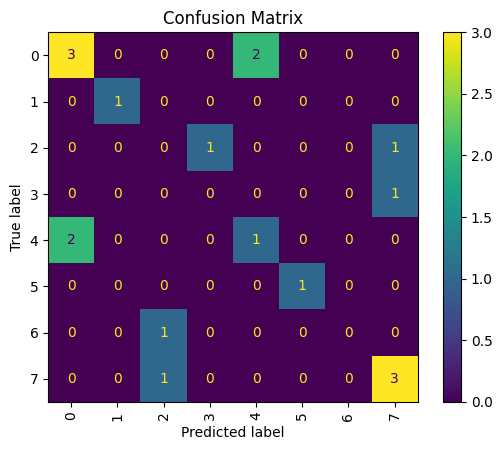

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

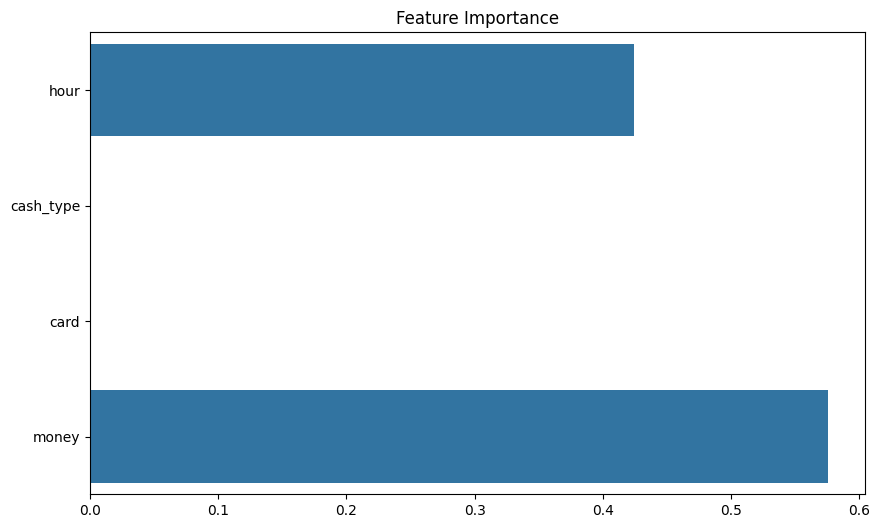

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance
feature_importances = model.feature_importances_
feature_names = ['hour', 'cash_type', 'card', 'money']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.show()